In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from SSMTIA.utils import mapping, parameter_range
from scipy import stats
import math

In [2]:
df = pd.read_csv("analysis/not_uploaded/parsed/SSIA_mobilenet_test_scores.csv")

df["score"] = (df["styles_score"] + df["technical_score"] + df["composition_score"])/3

df

,img,parameter,change,styles_score,technical_score,composition_score,score
0,abbey-glass-religion-architecture-106158.jpeg,original,0.0,0.4170,0.7373,0.5250,0.559767
1,abraham-lincoln-lincoln-memorial-washington-dc...,original,0.0,0.3533,0.9155,0.6724,0.647067
2,abstract-background-backgrounds-botany-87770.jpeg,original,0.0,0.4740,0.9136,0.3235,0.570367
3,adler-bird-bird-of-prey-raptor-53587.jpeg,original,0.0,0.6343,0.8660,0.2776,0.592633
4,adult-cute-face-female-41522.jpeg,original,0.0,0.8813,0.9860,0.8170,0.894767
...,...,...,...,...,...,...,...
2579995,wood-painting-window-cactus-6689.jpg,ratio,5.0,0.7036,0.7905,0.9697,0.821267
2579996,wood-sky-forest-autumn.jpg,ratio,5.0,0.3704,0.6690,0.2325,0.423967
2579997,wood-stool-wooden-wine.jpg,ratio,5.0,0.5650,0.8604,0.5776,0.667667
2579998,wood-tree-brown-bark.jpg,ratio,5.0,0.3628,0.3872,0.4058,0.385267


In [3]:
pd.DataFrame(df[df["parameter"] != "original"][["img", "styles_score", "technical_score", "composition_score", "score"]].groupby("img").max().to_records()).sort_values("img")

,img,styles_score,technical_score,composition_score,score
0,SW_Pamela%2BWebb.jpg,0.9385,0.9795,0.9320,0.913733
1,abbey-glass-religion-architecture-106158.jpeg,0.8633,0.8930,0.9180,0.710433
2,abraham-lincoln-lincoln-memorial-washington-dc...,0.8850,0.9644,0.8840,0.832767
3,abstract-background-backgrounds-botany-87770.jpeg,0.7236,0.9897,0.6255,0.715367
4,adler-bird-bird-of-prey-raptor-53587.jpeg,0.7837,0.9270,0.8403,0.824800
...,...,...,...,...,...
14995,wood-painting-window-cactus-6689.jpg,0.9520,0.9510,0.9770,0.930000
14996,wood-sky-forest-autumn.jpg,0.7095,0.9473,0.6960,0.716400
14997,wood-stool-wooden-wine.jpg,0.9077,0.9900,0.9190,0.873333
14998,wood-tree-brown-bark.jpg,0.9650,0.9960,0.7417,0.863367


In [4]:
df[df["parameter"] == "original"][["img", "styles_score", "technical_score", "composition_score", "score"]].sort_values("img").reset_index()

,index,img,styles_score,technical_score,composition_score,score
0,2567963,SW_Pamela%2BWebb.jpg,0.7870,0.9585,0.8984,0.881300
1,0,abbey-glass-religion-architecture-106158.jpeg,0.4170,0.7373,0.5250,0.559767
2,1,abraham-lincoln-lincoln-memorial-washington-dc...,0.3533,0.9155,0.6724,0.647067
3,2,abstract-background-backgrounds-botany-87770.jpeg,0.4740,0.9136,0.3235,0.570367
4,3,adler-bird-bird-of-prey-raptor-53587.jpeg,0.6343,0.8660,0.2776,0.592633
...,...,...,...,...,...,...
14995,2579140,wood-painting-window-cactus-6689.jpg,0.7007,0.8433,0.7847,0.776233
14996,2579141,wood-sky-forest-autumn.jpg,0.2401,0.7200,0.2915,0.417200
14997,2579142,wood-stool-wooden-wine.jpg,0.6940,0.9590,0.6920,0.781667
14998,2579143,wood-tree-brown-bark.jpg,0.3264,0.4710,0.1970,0.331467


In [ ]:
# & (df["parameter"] != "pixelate") & (df["parameter"] != "impulse_noise")
scores = pd.DataFrame(df[(df["parameter"] != "original")][["img", "styles_score", "technical_score", "composition_score"]].groupby("img").max().to_records()).sort_values("img").rename(columns={"styles_score":"best_score_styles", "technical_score":"best_score_technical", "composition_score":"best_score_composition"})
scores["orig_score_styles"] = df[df["parameter"] == "original"][["img", "styles_score"]].sort_values("img").reset_index()["styles_score"]
scores["orig_score_technical"] = df[df["parameter"] == "original"][["img", "technical_score"]].sort_values("img").reset_index()["technical_score"]
scores["orig_score_composition"] = df[df["parameter"] == "original"][["img", "composition_score"]].sort_values("img").reset_index()["composition_score"]
scores["diff_styles"] = scores["orig_score_styles"] - scores["best_score_styles"]
scores["diff_technical"] = scores["orig_score_technical"] - scores["best_score_technical"]
scores["diff_composition"] = scores["orig_score_composition"] - scores["best_score_composition"]
scores

In [ ]:
scores.nlargest(10, "diff_styles")

In [ ]:
scores.nlargest(10, "diff_technical")

In [ ]:
scores.nlargest(10, "diff_composition")

In [ ]:
scores.nsmallest(10, "diff_styles")

In [ ]:
scores.nsmallest(10, "diff_technical")

In [ ]:
scores.nsmallest(10, "diff_composition")

In [ ]:
nsmall = []
for i, row in scores.nsmallest(10, "diff_styles").iterrows():
    nsmall.append(df[(df["img"] == row.img) & (df["styles_score"] == row.best_score_styles)])
pd.concat(nsmall)

In [ ]:
nsmall = []
for i, row in scores.nsmallest(10, "diff_technical").iterrows():
    nsmall.append(df[(df["img"] == row.img) & (df["technical_score"] == row.best_score_technical)])
pd.concat(nsmall)

In [ ]:
nsmall = []
for i, row in scores.nsmallest(10, "diff_composition").iterrows():
    nsmall.append(df[(df["img"] == row.img) & (df["composition_score"] == row.best_score_composition)])
pd.concat(nsmall)

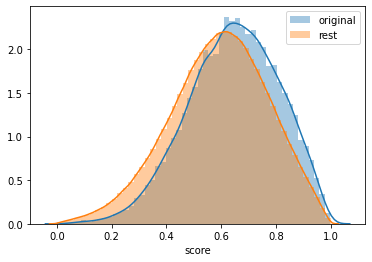

In [5]:
sns.distplot(df[df["parameter"] == "original"]["score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["score"], label="rest")
plt.legend()

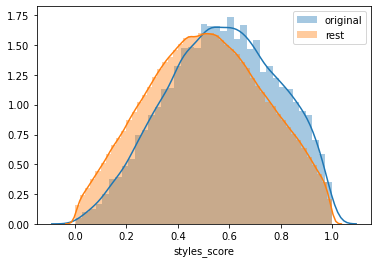

In [6]:
sns.distplot(df[df["parameter"] == "original"]["styles_score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["styles_score"], label="rest")
plt.legend()

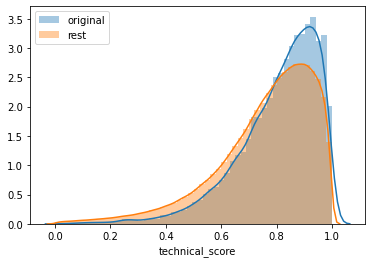

In [7]:
sns.distplot(df[df["parameter"] == "original"]["technical_score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["technical_score"], label="rest")
plt.legend()

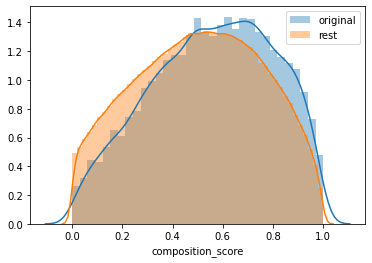

In [8]:
sns.distplot(df[df["parameter"] == "original"]["composition_score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["composition_score"], label="rest")
plt.legend()

In [11]:
def histogram_distortion(distortion:str, score:str):
    sns.distplot(df[df["parameter"] == "original"][score], label="original")
    for change in (val for val in mapping["all_changes"] if distortion in val):
        parameter, change = change.split(";")
        sns.distplot(df[(df["parameter"] == parameter) & (df["change"] == float(change))][score], label=f"{parameter}: {change}")
    plt.legend()

In [12]:
def violin_distortion(distortion:str, score:str):
    plot_frame = df[(df["parameter"] == distortion) | (df["parameter"] == "original")]
    if distortion in parameter_range:
        plot_frame.loc[plot_frame["parameter"] == "original", "change"] = parameter_range[distortion]["default"]
    sns.violinplot(data=plot_frame, x="change", y=score, color="steelblue")

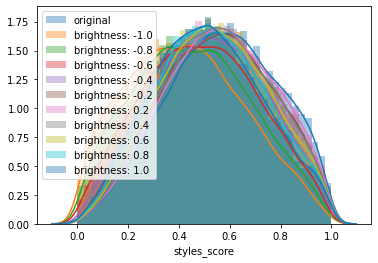

In [13]:
histogram_distortion("brightness", "styles_score")

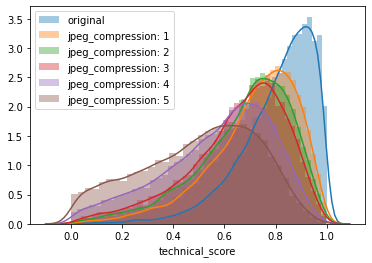

In [14]:
histogram_distortion("jpeg_compression", "technical_score")

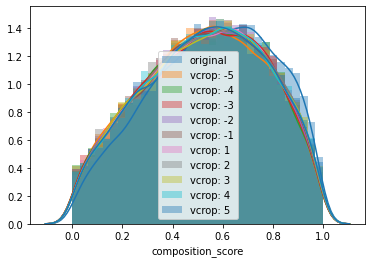

In [15]:
histogram_distortion("vcrop", "composition_score")

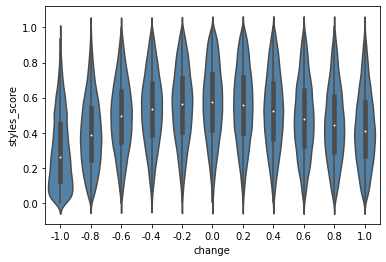

In [16]:
violin_distortion("contrast", "styles_score")

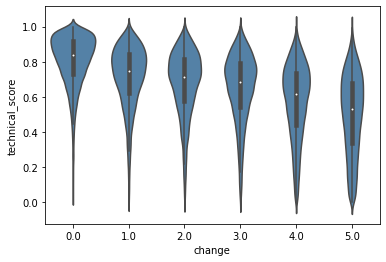

In [17]:
violin_distortion("jpeg_compression", "technical_score")

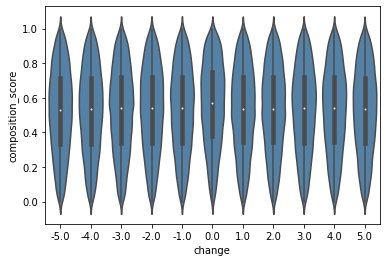

In [18]:
violin_distortion("hcrop", "composition_score")

In [ ]:
avg_scores = df[["parameter","change", "score", "styles_score", "technical_score", "composition_score"]].groupby(["parameter", "change"]).mean().reset_index()
avg_scores.to_csv("analysis/SSMTIA/avg_scores.csv", index=False)
avg_scores

In [ ]:
parameter = "saturation"
sns.lineplot(data=avg_scores[avg_scores.parameter == parameter], x="change", y="score", label="score")
sns.lineplot(data=avg_scores[avg_scores.parameter == parameter], x="change", y="styles_score", label="style")
sns.lineplot(data=avg_scores[avg_scores.parameter == parameter], x="change", y="technical_score", label="technical")
sns.lineplot(data=avg_scores[avg_scores.parameter == parameter], x="change", y="composition_score", label="composition")

In [ ]:
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

fg = sns.FacetGrid(df[(df["parameter"] == "saturation") & (df["change"] == 1.0)], row="pred_change", aspect=15, height=.5)
fg.map(sns.kdeplot, "pred_change_degree")

#fg.map(label, "pred_change")

#fg.set_titles("")
#fg.set(yticks=[])
#fg.despine(bottom=True, left=True)

In [ ]:
def calculate_spearman(distortion: str, polarity: str, img_names=df["img"].unique()):
    corr_l = []
    p_l = []
    original_df = df[df["parameter"] == "original"]
    if distortion in parameter_range:
        original_df["change"] = parameter_range[distortion]["default"]

    parameter_df = df[df["parameter"] == distortion]
    corr_df = pd.concat([parameter_df, original_df])[["img", "parameter", "change", "score"]]

    for i, f in enumerate(img_names):
        if i % 1000 == 0:
            print(i)
        corr_df_img = corr_df[corr_df["img"] == f]

        if distortion in parameter_range:
            default = parameter_range[distortion]["default"]
        else:
            default = 0

        if polarity == "pos":
            corr_df_img = corr_df_img[corr_df_img["change"] >= default]
        else:
            corr_df_img = corr_df_img[corr_df_img["change"] <= default]

        corr_df_img["change"] = corr_df_img["change"].apply(lambda x: abs((x) - (default)))

        c, p = stats.spearmanr(corr_df_img["score"], corr_df_img["change"])
        if math.isnan(c) or math.isnan(p):
            continue
        corr_l.append(c)
        p_l.append(p)
    return sum(corr_l) / len(corr_l), sum(p_l) / len(p_l)

In [ ]:
calculate_spearman(distortion="brightness", polarity="neg")